In [3]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(
num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
train_input, train_target, test_size=0.2, random_state=42)

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [5]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-05 10:04:06.593335: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 10:04:06.593980: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 10:04:06.594511: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5',
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-01 10:07:22.345725: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-01 10:07:22.416172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:07:22.416678: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:07:22.417385: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

312/313 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5677

2024-02-01 10:07:25.888195: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:07:25.888937: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:07:25.889424: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 4s 10ms/step - loss: 0.6913 - accuracy: 0.5676 - val_loss: 0.6893 - val_accuracy: 0.6108
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6828 - accuracy: 0.6574 - val_loss: 0.6725 - val_accuracy: 0.6966
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6343 - accuracy: 0.7071 - val_loss: 0.5985 - val_accuracy: 0.7146
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5791 - accuracy: 0.7292 - val_loss: 0.5678 - val_accuracy: 0.7290
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5493 - accuracy: 0.7442 - val_loss: 0.5429 - val_accuracy: 0.7454
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5233 - accuracy: 0.7617 - val_loss: 0.5201 - val_accuracy: 0.7532
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5019 - accuracy: 0.7758 - val_loss: 0.5034 - val_accuracy: 0.7684
Epoc

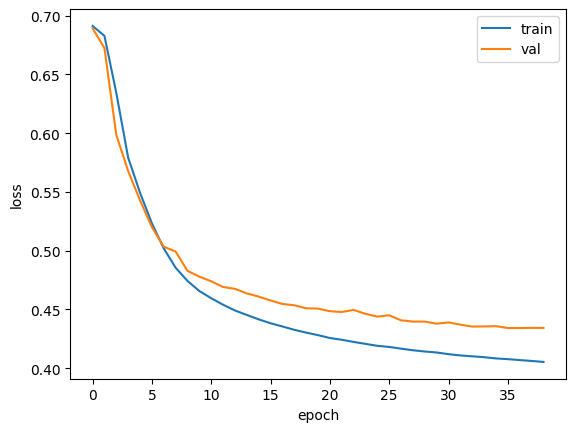

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-01 10:13:23.773075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:23.773830: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:23.774236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5',
							 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-01 10:13:39.905607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:39.906164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:39.906922: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

312/313 [============================>.] - ETA: 0s - loss: 0.6921 - accuracy: 0.5566

2024-02-01 10:13:43.666726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-01 10:13:43.667182: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-01 10:13:43.667781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 4s 11ms/step - loss: 0.6921 - accuracy: 0.5566 - val_loss: 0.6911 - val_accuracy: 0.5986
Epoch 2/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6890 - accuracy: 0.6191 - val_loss: 0.6859 - val_accuracy: 0.6508
Epoch 3/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6759 - accuracy: 0.6682 - val_loss: 0.6574 - val_accuracy: 0.6804
Epoch 4/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6107 - accuracy: 0.7090 - val_loss: 0.5878 - val_accuracy: 0.7160
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5738 - accuracy: 0.7278 - val_loss: 0.5635 - val_accuracy: 0.7364
Epoch 6/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5544 - accuracy: 0.7406 - val_loss: 0.5444 - val_accuracy: 0.7546
Epoch 7/100
313/313 [==============================] - 3s 10ms/step - loss: 0.5364 - accuracy: 0.7526 - val_loss: 0.5280 - val_accuracy: 0.7614
Epoc

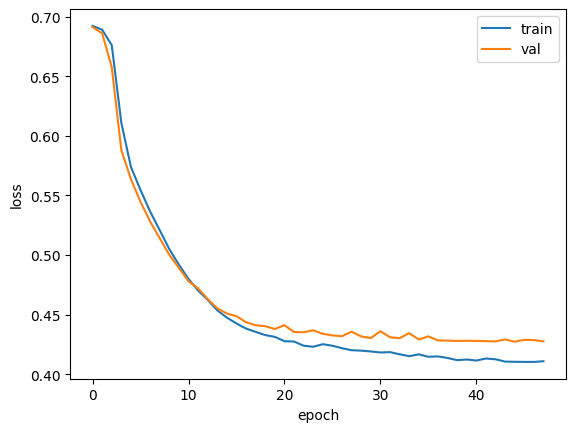

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-05 09:17:32.064605: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 09:17:32.065107: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 09:17:32.065699: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [7]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [8]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',
save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-05 09:21:39.977820: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-05 09:21:40.071384: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 09:21:40.071913: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 09:21:40.072289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

313/313 [==============================] - ETA: 0s - loss: 0.6930 - accuracy: 0.5130

2024-02-05 09:21:46.832343: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 09:21:46.832819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 09:21:46.833222: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 7s 20ms/step - loss: 0.6930 - accuracy: 0.5130 - val_loss: 0.6928 - val_accuracy: 0.5192
Epoch 2/100
313/313 [==============================] - 6s 20ms/step - loss: 0.6923 - accuracy: 0.5641 - val_loss: 0.6916 - val_accuracy: 0.6066
Epoch 3/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6902 - accuracy: 0.6235 - val_loss: 0.6884 - val_accuracy: 0.6448
Epoch 4/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6838 - accuracy: 0.6452 - val_loss: 0.6769 - val_accuracy: 0.6768
Epoch 5/100
313/313 [==============================] - 6s 19ms/step - loss: 0.6567 - accuracy: 0.6781 - val_loss: 0.6185 - val_accuracy: 0.7052
Epoch 6/100
313/313 [==============================] - 6s 20ms/step - loss: 0.5725 - accuracy: 0.7206 - val_loss: 0.5390 - val_accuracy: 0.7378
Epoch 7/100
313/313 [==============================] - 6s 19ms/step - loss: 0.5326 - accuracy: 0.7469 - val_loss: 0.5181 - val_accuracy: 0.7554
Epoc

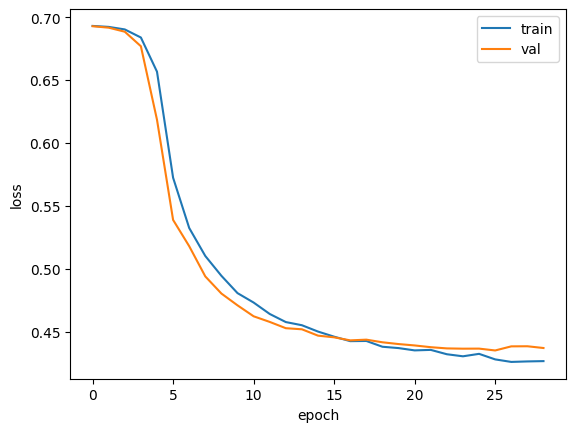

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [1]:
# GRU

In [7]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

2024-02-05 10:04:18.568093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 10:04:18.568517: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 10:04:18.569141: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [9]:
import matplotlib.pyplot as plt
model4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [10]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy',
		 metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5',
				 save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
restore_best_weights=True)
history = model4.fit(train_seq, train_target, epochs=100, batch_size=64,
validation_data=(val_seq, val_target),
callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100


2024-02-05 10:17:29.022965: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-02-05 10:17:29.096955: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 10:17:29.097419: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 10:17:29.097810: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG IN

311/313 [============================>.] - ETA: 0s - loss: 0.6919 - accuracy: 0.5401

2024-02-05 10:17:32.898177: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-02-05 10:17:32.898762: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-02-05 10:17:32.899273: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

313/313 [==============================] - 4s 11ms/step - loss: 0.6919 - accuracy: 0.5399 - val_loss: 0.6912 - val_accuracy: 0.5584
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6893 - accuracy: 0.5918 - val_loss: 0.6883 - val_accuracy: 0.5976
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6853 - accuracy: 0.6081 - val_loss: 0.6839 - val_accuracy: 0.6024
Epoch 4/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6792 - accuracy: 0.6190 - val_loss: 0.6772 - val_accuracy: 0.6102
Epoch 5/100
313/313 [==============================] - 3s 10ms/step - loss: 0.6704 - accuracy: 0.6313 - val_loss: 0.6676 - val_accuracy: 0.6154
Epoch 6/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6578 - accuracy: 0.6402 - val_loss: 0.6541 - val_accuracy: 0.6258
Epoch 7/100
313/313 [==============================] - 3s 11ms/step - loss: 0.6403 - accuracy: 0.6525 - val_loss: 0.6348 - val_accuracy: 0.6462
Epoc